In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import paddle
import paddle.nn as nn
from paddle.vision.datasets import MNIST,Cifar10
from paddle.io import Dataset
import warnings
warnings.filterwarnings("ignore")


In [2]:
mnist = MNIST(mode='train')

In [13]:
def plot_num_images(num):
    if num < 1:
        print('INFO:The number of input pictures must be greater than zero!')
    else:
        choose_list = []
        for i in range(num):
            choose_n = np.random.randint(len(mnist))
            choose_list.append(choose_n)
        fig = plt.gcf()
        fig.set_size_inches(15, 17)
        for i in range(num):
            ax_img = plt.subplot(math.ceil(num / 2), 5, i + 1)
            plt_img = mnist[choose_list[i]][0]
            ax_img.imshow(plt_img, cmap='binary')
            ax_img.set_title(str(mnist[choose_list[i]][1].item()),
                             fontsize=20)
        plt.show()



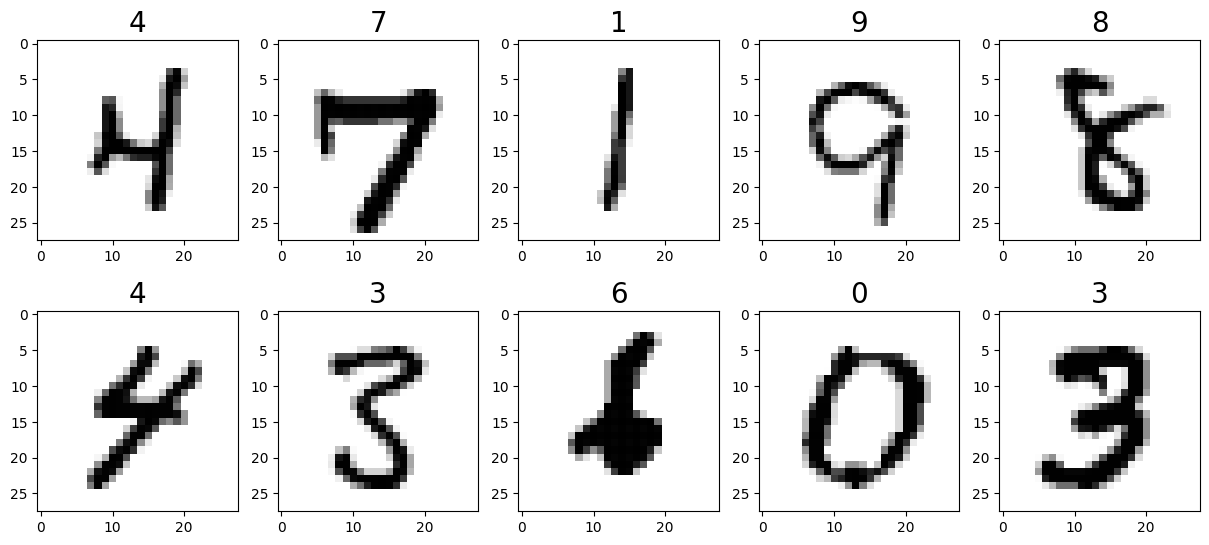

In [14]:
plot_num_images(10)


In [22]:
import paddle
from paddle.vision.transforms import Normalize

def get_MNIST_dataloader():
    # 定义图像归一化处理方法，这里的CHW指图像格式需为 [C通道数，H图像高度，W图像宽度]
    transform = Normalize(mean=[127.5], std=[127.5], data_format='chw')
    # 下载数据集并初始化 dataset
    train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)
    test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)

    # 定义并初始化数据读取器
    train_loader = paddle.io.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=1, drop_last=True)
    test_loader = paddle.io.DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=1, drop_last=False)

    return train_loader, test_loader

In [23]:
train_loader, test_loader = get_MNIST_dataloader()

In [24]:
for batch_id, data in enumerate(train_loader()):
    images, labels = data
    print(images.shape)
    print(labels.shape)
    break

[128, 1, 28, 28]
[128, 1]


In [41]:
import visualdl
import visualdl.server.app 
visualdl.server.app.run('./run',
                        host="127.0.0.1",
                        port=8080,
                        cache_timeout=20)

6736

In [46]:
# 创建第一个模型
class AutoEncoder(nn.Layer):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.Tanh(),
            nn.Linear(128, 32))

        self.decoder = nn.Sequential(
            nn.Linear(32, 128),
            nn.Tanh(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid())
    
    def forward(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return encoded, decoded

In [47]:
model = AutoEncoder()
paddle.jit.save(model, './run/mnist_experiment/auto1', [paddle.static.InputSpec([-1,1,28,28])])
model = paddle.Model(network)
model.summary((784))

---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
   Linear-73          [[784]]               [128]             100,480    
    Tanh-55           [[128]]               [128]                0       
   Linear-74          [[128]]                [64]              8,256     
    Tanh-56            [[64]]                [64]                0       
   Linear-75           [[64]]                [12]               780      
    Tanh-57            [[12]]                [12]                0       
   Linear-76           [[12]]                [3]                39       
   Linear-77           [[3]]                 [12]               48       
    Tanh-58            [[12]]                [12]                0       
   Linear-78           [[12]]                [64]               832      
    Tanh-59            [[64]]                [64]                0       
   Linear-79           [[64]]       

{'total_params': 219891, 'trainable_params': 219891}

In [62]:
# 创建第一个模型
class AutoEncoder1(nn.Layer):
    def __init__(self):
        super(AutoEncoder1, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 328),
            nn.Tanh(),
            nn.Linear(328, 64),
            nn.Tanh(),
            nn.Linear(64, 32),
            nn.Tanh(),
            nn.Linear(32, 12))

        self.decoder = nn.Sequential(
            nn.Linear(12, 32),
            nn.Tanh(),
            nn.Linear(32, 64),
            nn.Tanh(),
            nn.Linear(64, 328),
            nn.Tanh(),
            nn.Linear(328, 28 * 28),
            nn.Sigmoid())
    
    def forward(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return encoded, decoded


In [63]:
network = AutoEncoder1()
model = paddle.Model(network)
model.summary((784))

---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
  Linear-141          [[784]]               [328]             257,480    
   Tanh-101           [[328]]               [328]                0       
  Linear-142          [[328]]                [64]             21,056     
   Tanh-102            [[64]]                [64]                0       
  Linear-143           [[64]]                [32]              2,080     
   Tanh-103            [[32]]                [32]                0       
  Linear-144           [[32]]                [12]               396      
  Linear-145           [[12]]                [32]               416      
   Tanh-104            [[32]]                [32]                0       
  Linear-146           [[32]]                [64]              2,112     
   Tanh-105            [[64]]                [64]                0       
  Linear-147           [[64]]       

{'total_params': 562796, 'trainable_params': 562796}

In [92]:
import paddle.regularizer as reg

class AutoEncoder2(nn.Layer):
    def __init__(self):
        super(AutoEncoder2, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 328),
            nn.Dropout(0.1),
            nn.Tanh(),
            nn.Linear(328, 128),
            nn.Dropout(0.1),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Dropout(0.1),
            nn.Tanh(),
            nn.Linear(64, 32),
            nn.Dropout(0.1),
            nn.Tanh(),
            nn.Linear(32, 12))

        self.decoder = nn.Sequential(
            nn.Linear(12, 32),
            nn.Dropout(0.1),
            nn.Tanh(),
            nn.Linear(32, 64),
            nn.Dropout(0.1),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Dropout(0.1),
            nn.Tanh(),
            nn.Linear(128, 328),
            nn.Dropout(0.1),
            nn.Tanh(),
            nn.Linear(328, 28 * 28),
            nn.Sigmoid())

        # Add layer regularization

    def forward(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return encoded, decoded


In [91]:
network = AutoEncoder2()
model = paddle.Model(network)
model.summary((784))

---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
  Linear-206          [[784]]               [328]             257,480    
   Dropout-1          [[328]]               [328]                0       
   Tanh-149           [[328]]               [328]                0       
  Linear-207          [[328]]               [128]             42,112     
   Dropout-2          [[128]]               [128]                0       
   Tanh-150           [[128]]               [128]                0       
  Linear-208          [[128]]                [64]              8,256     
   Dropout-3           [[64]]                [64]                0       
   Tanh-151            [[64]]                [64]                0       
  Linear-209           [[64]]                [32]              2,080     
   Dropout-4           [[32]]                [32]                0       
   Tanh-152            [[32]]       

{'total_params': 621420, 'trainable_params': 621420}

In [94]:
# 训练配置
paddle.framework.seed(1)
EPOCH = 70
LR = 0.0001
N_TEST_IMG = 10


In [95]:
optimizer = paddle.optimizer.Adam(parameters=network.parameters(), learning_rate=LR)
loss_func = nn.MSELoss()
# loss_func = nn.functional.l1_loss

In [70]:
# 定义训练过程
from visualdl import LogWriter
logwriter = LogWriter(logdir="./run/auto0_3")
def train_auto1(model):
    # 定义优化器
    opt = paddle.optimizer.Adam(learning_rate=LR, parameters=model.parameters())
    # 训练参数
    iter = 0
    iter2 = 0
    for epoch_id in range(EPOCH):
        total_test_accuracy = 0  # 用于累积测试准确率
        for batch_id, data in enumerate(train_loader()):
            model.train()
            # 数据准备
            images, labels = data
            images = images.reshape((-1, 28 * 28))
            images = paddle.to_tensor(images)
            labels = paddle.reshape(labels, (-1,1))
            labels = paddle.to_tensor(labels)
            
            # 前向
            encoded, decoded = model(images)
            
            # 损失
            loss = loss_func(decoded, images)
            avg_loss= paddle.mean(loss)
            if batch_id%200 ==  0:
                print("epoch: {}, batch: {}, loss is: {}".format(epoch_id, batch_id, avg_loss.numpy()))
                logwriter.add_scalar(tag = 'train/loss' , step = iter, value=avg_loss.numpy())
                iter+=200
                
            # 反向传播
            loss.backward()
            opt.step()
            opt.clear_grad()


        for batch_id, data in enumerate(test_loader()):
            model.eval()
            images, labels = data
            images = images.reshape((-1, 28 * 28))
            images = paddle.to_tensor(images)
            labels = paddle.reshape(labels,(-1,1))
            labels = paddle.to_tensor(labels)

            # 预测
            encoded, decoded = model(images)
            # 损失
            loss = loss_func(decoded, images)
            avg_loss= paddle.mean(loss)

            if batch_id % 100 == 0:
                logwriter.add_scalar(tag='test/loss', step=iter2, value=avg_loss.numpy())
                iter2+=100


In [71]:
model = AutoEncoder()
train_auto1(model)

epoch: 0, batch: 0, loss is: [1.9198976]
epoch: 0, batch: 200, loss is: [0.9278727]
epoch: 0, batch: 400, loss is: [0.9278425]
epoch: 1, batch: 0, loss is: [0.92696536]
epoch: 1, batch: 200, loss is: [0.9266324]
epoch: 1, batch: 400, loss is: [0.92305815]


KeyboardInterrupt: 

In [96]:
# 定义训练过程
from visualdl import LogWriter
logwriter = LogWriter(logdir="./run/auto1_3_drop")
def train_auto1(model):
    # 定义优化器
    opt = paddle.optimizer.Adam(learning_rate=LR, parameters=model.parameters(), weight_decay=0.001)
    # 训练参数
    iter = 0
    iter2 = 0
    for epoch_id in range(EPOCH):
        total_test_accuracy = 0  # 用于累积测试准确率
        for batch_id, data in enumerate(train_loader()):
            model.train()
            # 数据准备
            images, labels = data
            images = images.reshape((-1, 28 * 28))
            images = paddle.to_tensor(images)
            labels = paddle.reshape(labels, (-1,1))
            labels = paddle.to_tensor(labels)
            
            # 前向
            encoded, decoded = model(images)
            
            # 损失
            loss = loss_func(decoded, images)
            avg_loss= paddle.mean(loss)
            if batch_id%200 ==  0:
                print("epoch: {}, batch: {}, loss is: {}".format(epoch_id, batch_id, avg_loss.numpy()))
                logwriter.add_scalar(tag = 'train/loss' , step = iter, value=avg_loss.numpy())
                iter+=200
                
            # 反向传播
            loss.backward()
            opt.step()
            opt.clear_grad()


        for batch_id, data in enumerate(test_loader()):
            model.eval()
            images, labels = data
            images = images.reshape((-1, 28 * 28))
            images = paddle.to_tensor(images)
            labels = paddle.reshape(labels,(-1,1))
            labels = paddle.to_tensor(labels)

            # 预测
            encoded, decoded = model(images)
            # 损失
            loss = loss_func(decoded, images)
            avg_loss= paddle.mean(loss)

            if batch_id % 100 == 0:
                logwriter.add_scalar(tag='test/loss', step=iter2, value=avg_loss.numpy())
                iter2+=100



In [97]:
model = AutoEncoder2()
train_auto1(model)

epoch: 0, batch: 0, loss is: [1.9136407]
epoch: 0, batch: 200, loss is: [0.96415436]
epoch: 0, batch: 400, loss is: [0.95010996]
epoch: 1, batch: 0, loss is: [0.94511175]
epoch: 1, batch: 200, loss is: [0.94769216]
epoch: 1, batch: 400, loss is: [0.9421913]
epoch: 2, batch: 0, loss is: [0.9419659]
epoch: 2, batch: 200, loss is: [0.9422342]
epoch: 2, batch: 400, loss is: [0.9409841]
epoch: 3, batch: 0, loss is: [0.9428327]
epoch: 3, batch: 200, loss is: [0.9377246]
epoch: 3, batch: 400, loss is: [0.94115424]
epoch: 4, batch: 0, loss is: [0.9417196]
epoch: 4, batch: 200, loss is: [0.9404758]
epoch: 4, batch: 400, loss is: [0.94213396]
epoch: 5, batch: 0, loss is: [0.9386028]
epoch: 5, batch: 200, loss is: [0.93943727]
epoch: 5, batch: 400, loss is: [0.9403819]
epoch: 6, batch: 0, loss is: [0.9407548]
epoch: 6, batch: 200, loss is: [0.94175196]
epoch: 6, batch: 400, loss is: [0.9375988]
epoch: 7, batch: 0, loss is: [0.94094414]
epoch: 7, batch: 200, loss is: [0.9372932]
epoch: 7, batch: 4

In [11]:
view_data = np.array([np.array(mnist[i][0]) / 255.0 for i in range(N_TEST_IMG)]).reshape(-1, 28 * 28).astype('float32')

step_loss_list = []
decoded_img_list = []
epoch_loss_list = []
network.train()
for epoch in range(EPOCH):
    for x, _ in train_loader:
        train_x = x.reshape([-1, 28 * 28])
        encoded, decoded = network(train_x)
        loss = loss_func(decoded, train_x)
        loss.backward()
        optimizer.step()
        optimizer.clear_grad()
        step_loss_list.append(loss.numpy())
    if (epoch + 1) % 5 == 0:
        print('Epoch: %2d' % (epoch + 1), '| train loss: %.4f' % np.mean(step_loss_list))
    epoch_loss_list.append(np.mean(step_loss_list))
    _, decoded_data = network(paddle.to_tensor(view_data))
    decoded_img_list.append(decoded_data)



Epoch:  5 | train loss: 0.9410


KeyboardInterrupt: 

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.plot(epoch_loss_list, color=(1, 0, 0))
plt.title('Autoencoder Training Value')
plt.show()


In [ ]:
import imageio
import cv2

img_data = view_data
concat_img = []
black = np.zeros([28, 1])
anim_file = 'assets/autoencoder.gif'

img_raw = np.hstack((img_data[0].reshape(28, 28) * 255, black,
                     img_data[1].reshape(28, 28) * 255, black,
                     img_data[2].reshape(28, 28) * 255, black,
                     img_data[3].reshape(28, 28) * 255, black,
                     img_data[4].reshape(28, 28) * 255, black,
                     img_data[5].reshape(28, 28) * 255, black,
                     img_data[6].reshape(28, 28) * 255, black,
                     img_data[7].reshape(28, 28) * 255, black,
                     img_data[8].reshape(28, 28) * 255, black,
                     img_data[9].reshape(28, 28) * 255)).astype('uint8')
size = (int(img_raw.shape[1] * 2.4), int(img_raw.shape[0] * 2.4))
img_raw = cv2.resize(img_raw, size)

with imageio.get_writer(anim_file, mode='I') as writer:
    for i in range(len(decoded_img_list)):
        img_decode = np.hstack((decoded_img_list[i].cpu().detach().numpy()[0].reshape(28, 28) * 255, black,
                         decoded_img_list[i].cpu().detach().numpy()[1].reshape(28, 28) * 255, black,
                         decoded_img_list[i].cpu().detach().numpy()[2].reshape(28, 28) * 255, black,
                         decoded_img_list[i].cpu().detach().numpy()[3].reshape(28, 28) * 255, black,
                         decoded_img_list[i].cpu().detach().numpy()[4].reshape(28, 28) * 255, black,
                         decoded_img_list[i].cpu().detach().numpy()[5].reshape(28, 28) * 255, black,
                         decoded_img_list[i].cpu().detach().numpy()[6].reshape(28, 28) * 255, black,
                         decoded_img_list[i].cpu().detach().numpy()[7].reshape(28, 28) * 255, black,
                         decoded_img_list[i].cpu().detach().numpy()[8].reshape(28, 28) * 255, black,
                         decoded_img_list[i].cpu().detach().numpy()[9].reshape(28, 28) * 255)).astype('uint8')
        img_decode = cv2.resize(img_decode, size)
        img = np.vstack((img_raw, img_decode))
        writer.append_data(img)



In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

network.eval()
view_data = np.array([np.array(mnist[i][0]) / 255.0 for i in range(5000)]).reshape(-1, 28 * 28).astype('float32')
encoded_data, _ = network(paddle.to_tensor(view_data))
fig = plt.figure(2)
fig.set_size_inches(15, 15)
ax = Axes3D(fig)
X, Y, Z = encoded_data.numpy()[:, 0], encoded_data.numpy()[:, 1], encoded_data.numpy()[:, 2]
values = [np.array(mnist[i][1]).item() for i in range(5000)]
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255 * s / 9))
    ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())
plt.show()
